This notebook will compute the MCMC results from the LenstronomyMaster notebook.

In [4]:
# some python imports
# Version: 0.4.0 of lenstronomy
# Edit the title; galfit should be changed to gravlens
#Edit for MCMC calculation of the posterir distbrution
__author__ = 'edenm'
import matplotlib.pyplot as plt
import pickle
from lenstronomy.Plots.output_plots import LensModelPlot
import numpy as np
import pandas as pd
import os
import corner
import time

In [2]:
# Load the pickled data from the LenstronomyMaster Notebook
def getPickledData(Path, LensName):
    pick_path = Path
    # Check to see if MCMC Files exist
    if os.path.isfile("%s/samples_mcmc_result_%s.pickle" % (Path, LensName)):
        kwargs_data = pickle.load(open("%s/kwargs_data_%s.pickle" % (pick_path, LensName), 'rb'))
        kwargs_psf_out = pickle.load(open("%s/kwargs_psf_out_%s.pickle" % (pick_path, LensName), 'rb'))
        kwargs_numerics = pickle.load(open("%s/kwargs_numerics_%s.pickle" % (pick_path, LensName), 'rb'))
        kwargs_model = pickle.load(open("%s/kwargs_model_%s.pickle" % (pick_path, LensName), 'rb'))
        lens_result = pickle.load(open("%s/lens_result_%s.pickle" % (pick_path, LensName), 'rb'))
        source_result = pickle.load(open("%s/source_result_%s.pickle" % (pick_path, LensName), 'rb'))
        lens_light_result = pickle.load(open("%s/lens_light_result_%s.pickle" % (pick_path, LensName), 'rb'))
        ps_result = pickle.load(open("%s/ps_result_%s.pickle" % (pick_path, LensName), 'rb'))
        param_list = pickle.load(open("%s/param_list_%s.pickle" % (pick_path, LensName), 'rb'))

        chain_list = pickle.load(open("%s/chain_list_%s.pickle" % (pick_path, LensName), 'rb'))
        samples_mcmc = pickle.load(open("%s/samples_mcmc_result_%s.pickle" % (pick_path, LensName), 'rb'))
        param_mcmc = pickle.load(open("%s/param_mcmc_result_%s.pickle" % (pick_path, LensName), 'rb'))

        # For making 0.4.0 compaatible with 0.4.5; in 0.4.5 has 'ra_0': 0 and 'dec_0':0
        try:
            del lens_result[1]['ra_0']
            del lens_result[1]['dec_0']
        except:
            pass

        return lens_result, source_result, lens_light_result, ps_result, chain_list, param_list, kwargs_data, kwargs_numerics, kwargs_model, kwargs_psf_out, samples_mcmc, param_mcmc

    else:
        kwargs_data = pickle.load(open("%s/kwargs_data_%s.pickle" % (pick_path, LensName), 'rb'))
        kwargs_psf_out = pickle.load(open("%s/kwargs_psf_out_%s.pickle" % (pick_path, LensName), 'rb'))
        kwargs_numerics = pickle.load(open("%s/kwargs_numerics_%s.pickle" % (pick_path, LensName), 'rb'))
        kwargs_model = pickle.load(open("%s/kwargs_model_%s.pickle" % (pick_path, LensName), 'rb'))
        lens_result = pickle.load(open("%s/lens_result_%s.pickle" % (pick_path, LensName), 'rb'))
        source_result = pickle.load(open("%s/source_result_%s.pickle" % (pick_path, LensName), 'rb'))
        lens_light_result = pickle.load(open("%s/lens_light_result_%s.pickle" % (pick_path, LensName), 'rb'))
        ps_result = pickle.load(open("%s/ps_result_%s.pickle" % (pick_path, LensName), 'rb'))
        param_list = pickle.load(open("%s/param_list_%s.pickle" % (pick_path, LensName), 'rb'))

        chain_list = pickle.load(open("%s/chain_list_%s.pickle" % (pick_path, LensName), 'rb'))

        # For making 0.4.0 compaatible with 0.4.5; in 0.4.5 has 'ra_0': 0 and 'dec_0':0
        try:
            del lens_result[1]['ra_0']
            del lens_result[1]['dec_0']
        except:
            pass

        return lens_result, source_result, lens_light_result, ps_result, chain_list, param_list, kwargs_data, kwargs_numerics, kwargs_model, kwargs_psf_out

## Note
Lines 123 and 124 set the `burnin` or number of steps in the MCMC which the model will ignore. When plotting for the first time, set it to 0. ANd once the plots are made examine the plots and determine an appropriate `burnin` as determined by the median and standard deviation lines on the plot.

In [5]:
# Actual Plotting Routine
def getPlots(Path, LensName, BurnIn):
    "Get the pickled data"
    import os
    if os.path.isfile("%s/samples_mcmc_result_%s.pickle" % (Path, LensName)):
        lens_result, source_result, lens_light_result, ps_result, chain_list, param_list, kwargs_data, kwargs_numerics, kwargs_model, kwargs_psf_out, samples_mcmc, param_mcmc = getPickledData(Path, LensName)
    else:
        lens_result, source_result, lens_light_result, ps_result, chain_list, param_list, kwargs_data, kwargs_numerics, kwargs_model, kwargs_psf_out = getPickledData(Path, LensName)

    "Plotting the Data"
    lensPlot = LensModelPlot(kwargs_data, kwargs_psf_out, kwargs_numerics, kwargs_model, lens_result, source_result,
                             lens_light_result, ps_result, arrow_size=0.02, cmap_string="gist_heat")

    # For printing only the chi sq
    if True:
        f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

        lensPlot.data_plot(ax=axes[0, 0])
        lensPlot.model_plot(ax=axes[0, 1])
        lensPlot.normalized_residual_plot(ax=axes[0, 2], v_min=-6, v_max=6)
        lensPlot.source_plot(ax=axes[1, 0], convolution=False, deltaPix_source=0.01, numPix=100)
        lensPlot.convergence_plot(ax=axes[1, 1], v_max=1)
        lensPlot.magnification_plot(ax=axes[1, 2])
        f.tight_layout()
        f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
        plt.savefig("%s/%s_Plot1.pdf" % (Path, LensName))
        #plt.show()

        f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

        lensPlot.decomposition_plot(ax=axes[0, 0], text='Lens light', lens_light_add=True, unconvolved=True)
        lensPlot.decomposition_plot(ax=axes[1, 0], text='Lens light convolved', lens_light_add=True)
        lensPlot.decomposition_plot(ax=axes[0, 1], text='Source light', source_add=True, unconvolved=True)
        lensPlot.decomposition_plot(ax=axes[1, 1], text='Source light convolved', source_add=True)
        lensPlot.decomposition_plot(ax=axes[0, 2], text='All components', source_add=True, lens_light_add=True,
                                    unconvolved=True)
        lensPlot.decomposition_plot(ax=axes[1, 2], text='All components convolved', source_add=True, lens_light_add=True,
                                    point_source_add=True)
        f.tight_layout()
        f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
        #plt.show()
        plt.savefig("%s/%s_Plot2.pdf" % (Path, LensName))

        #plt.show()
        print "This is the lens result", "\n", lens_result #To access a particular value must index the array lens_result[0]
        print "This is the source result", "\n", source_result
        print "This is the lens light result", "\n", lens_light_result
        print "This is the point source result", "\n", ps_result

        import lenstronomy.Plots.output_plots as out_plot

        "Plot the trajectory of the particles"
        print "PLOTTING THE TRAJECTORY"
        #print "THIS IS THE CHAIN LIST"
        #print chain_list

        for i in range(len(chain_list)):
            if len(param_list[i]) != 0:
                f, axes = out_plot.plot_chain(chain_list[i], param_list[i])
            f.show()
            f.savefig("%s/%s_Plot3_Params.pdf" % (Path, LensName))

        "Calculating some Statistics"
        import lenstronomy.Util.util as util
        data = lensPlot._data[0:50, 0:50]
        #data = lensPlot._data
        print "Median", np.median(data)
        print "Width", np.std(data)
        data1d = util.image2array(data)
        plt.hist(data1d, bins=np.linspace(-.2, 0.2, 100))
        print "\n"

        "Plot the PSF Iteration"
        f, axes = out_plot.psf_iteration_compare(kwargs_psf_out, vmin=-6)
        f.savefig("%s/%s_Plot4_PSF_Iteration.pdf" % (Path, LensName))

        "Plot the data and its comonents"
        f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

        lensPlot.subtract_from_data_plot(ax=axes[0, 0], text='Data')
        lensPlot.subtract_from_data_plot(ax=axes[0, 1], text='Data - Point Source', point_source_add=True)
        lensPlot.subtract_from_data_plot(ax=axes[0, 2], text='Data - Lens Light', lens_light_add=True)
        lensPlot.subtract_from_data_plot(ax=axes[1, 0], text='Data - Source Light', source_add=True)
        lensPlot.subtract_from_data_plot(ax=axes[1, 1], text='Data - Source Light - Point Source', source_add=True,
                                         point_source_add=True)
        lensPlot.subtract_from_data_plot(ax=axes[1, 2], text='Data - Lens Light - Point Source', lens_light_add=True,
                                         point_source_add=True)
        f.tight_layout()
        f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
        f.savefig("%s/%s_Plot5_DataComponents.pdf" % (Path, LensName))

        plt.close()

        # Check to see if MCMC data exists
        if os.path.isfile("%s/samples_mcmc_result_%s.pickle" % (Path, LensName)):
            "Plot the MCMC Corner Plot"
            print("number of non-linear parameters in the MCMC process: ", len(param_mcmc))
            print("parameters in order: ", param_mcmc)
            print("number of evaluations in the MCMC process: ", np.shape(samples_mcmc)[0])

            "Plotting MCMC Trace"
            walker_ratio = 10

            if not samples_mcmc == []:
                n_params = samples_mcmc.shape[1]
                n_walkers = walker_ratio * n_params
                n_step = samples_mcmc.shape[0] / n_walkers

                print ("***---PARAMS, WALKERS, NSTEP---***")
                print (n_params, n_walkers, n_step)

                chain = np.empty((n_walkers, n_step, n_params))
                for i in np.arange(n_params):
                    samples = samples_mcmc[:, i].T
                    chain[:, :, i] = samples.reshape((n_step, n_walkers)).T

                print "---------- THIS IS THE CHAIN ----------"
                print chain
                print (np.shape(chain))
                # For Slicing the MCMC and corner Plot
                n, num_param = np.shape(samples_mcmc)
                
                # burnin = BurnIn
                burnin = 0

                #Save the Cropped Chain
                pickle.dump(chain[:, burnin:, :].reshape((-1, n_params)), open("%s/MCMC_Chain_%s.pickle" % (Path, LensName), 'wb'))
                print ("The cropped Chain was saved for ", LensName)
                print ("This is the shape of the sliced chain", np.shape(chain[:, burnin:, :].reshape((-1, n_params))))

                plot1 = corner.corner(chain[:, burnin:, :].reshape((-1, n_params)), labels=param_mcmc[:], show_titles=True, quantiles=(0.159, .5, 0.841),verbose=True)

                plot1.savefig("%s/%s_MCMC_1.pdf" % (Path, LensName))

                t = time.clock()
                mean_pos = np.zeros((n_params, n_step))
                median_pos = np.zeros((n_params, n_step))
                std_pos = np.zeros((n_params, n_step))
                q16_pos = np.zeros((n_params, n_step))
                q84_pos = np.zeros((n_params, n_step))

                # chain = np.empty((nwalker, nstep, ndim), dtype = np.double)
                for i in np.arange(n_params):
                    for j in np.arange(n_step):
                        mean_pos[i][j] = np.mean(chain[:, j, i])
                        median_pos[i][j] = np.median(chain[:, j, i])
                        std_pos[i][j] = np.std(chain[:, j, i])
                        q16_pos[i][j] = np.percentile(chain[:, j, i], 16.)
                        q84_pos[i][j] = np.percentile(chain[:, j, i], 84.)

                print('Elapsed time: %.2f s' % (time.clock() - t))

                fig, ax = plt.subplots(n_params, sharex=True, figsize=(16, 2 * n_params))

                last = n_step
                
                "Plots the median of all the parameters in MCMC"
                for i in range(n_params):
                    ax[i].plot(median_pos[i][:last], c='g')
                    ax[i].axhline(np.median(median_pos[i][burnin:last]), c='r', lw=1)
                    ax[i].fill_between(np.arange(last), q84_pos[i][:last], q16_pos[i][:last], alpha=0.4)
                    ax[i].set_ylabel(param_mcmc[i])
                    ax[i].set_xlim(0, last)
                fig.set_size_inches((12., 16.))
                plt.savefig("%s/%s_MCMC_3.pdf" % (Path, LensName))
                print "Save path: ", "%s/%s_MCMC_3.pdf" % (Path, LensName)

# Load the config file and run the plotting routine

/anaconda3/lib/python2.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Skipping J0047 

Skipping J0246sel 

Skipping J0806 

Skipping J1001 

Skipping J1650 

Skipping J2209 

Skipping J1206 

Plotting JU673


/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:216: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:247: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:276: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


('reduced chi^2 = ', 1.0635034895632571)


/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:540: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(model), origin='lower', vmin=v_min, vmax=v_max,


This is the lens result 
[{'center_x': 0, 'center_y': 0, 'e1': 0.15618122240577453, 'theta_E': 1.212581816232735, 'e2': 0.1874709942418453}, {'e1': -0.06186138607049884, 'e2': 0.13999492852746936}]
This is the source result 
[{'n_sersic': 1.4224016998670075, 'amp': 0.005166299882858525, 'center_x': 0.7252027594328133, 'center_y': 0.006439378162274523, 'R_sersic': 1.742201726359672}]
This is the lens light result 
[{'R_sersic': 0.4070183099522823, 'n_sersic': 3.185666994594326, 'center_x': 0, 'center_y': 0, 'amp': 0.4221933648842344, 'e1': 0.06656489380602376, 'e2': -0.14402502722711363}]
This is the point source result 
[{'point_amp': array([ 4174.21131117, 32199.53524486]), 'ra_image': array([-0.38029748,  1.75477103]), 'dec_image': array([-0.04362295,  0.58161183])}]
PLOTTING THE TRAJECTORY


/anaconda3/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Median -0.007168079
Width 0.26728234




/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:695: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(psf_in), origin='lower', **kwargs)
/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:695: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(psf_in), origin='lower', **kwargs)
/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:709: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(psf_out), origin='lower', **kwargs)
/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:709: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(psf_out), origin='lower', **kwargs)
/anaconda3/lib/python2.7/site-packages/lenstronomy/Plots/output_plots.py:562: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


('number of non-linear parameters in the MCMC process: ', 13)
('parameters in order: ', ['e1_lens', 'e2_lens', 'e1_lens', 'R_sersic_source_light', 'n_sersic_source_light', 'R_sersic_lens_light', 'n_sersic_lens_light', 'e1_lens_light', 'e2_lens_light', 'ra_image', 'ra_image', 'dec_image', 'dec_image'])
('number of evaluations in the MCMC process: ', 91000)
***---PARAMS, WALKERS, NSTEP---***
(13, 130, 700)
---------- THIS IS THE CHAIN ----------
[[[ 0.15618122  0.18747099 -0.06186139 ...  1.75477103 -0.04362295
    0.58161183]
  [ 0.15618122  0.18747099 -0.06186139 ...  1.75477103 -0.04362295
    0.58161183]
  [ 0.15618122  0.18747099 -0.06186139 ...  1.75477103 -0.04362295
    0.58161183]
  ...
  [ 0.15618122  0.18747099 -0.06186139 ...  1.75477103 -0.04362295
    0.58161183]
  [ 0.15618122  0.18747099 -0.06186139 ...  1.75477103 -0.04362295
    0.58161183]
  [ 0.15618122  0.18747099 -0.06186139 ...  1.75477103 -0.04362295
    0.58161183]]

 [[ 0.15618122  0.18747099 -0.06186139 ...  1.

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:104: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


('The cropped Chain was saved for ', u'JU673')
('This is the shape of the sliced chain', (91000, 13))


ValueError: It looks like the parameter(s) in column(s) 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 have no dynamic range. Please provide a `range` argument.

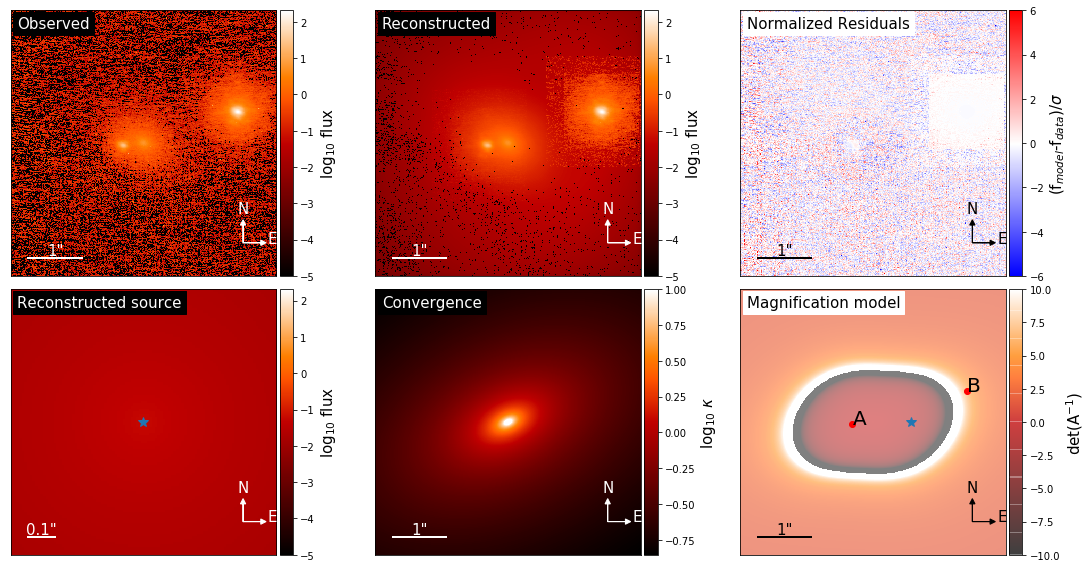

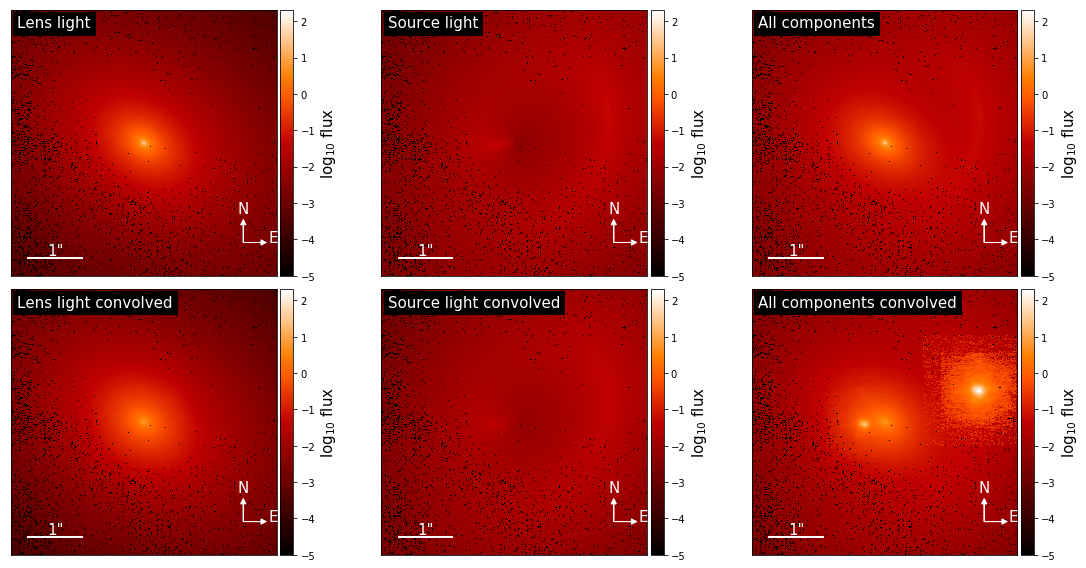

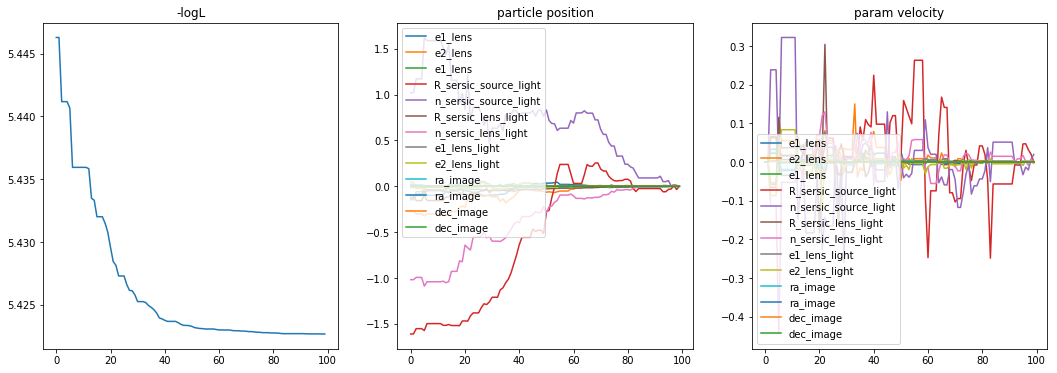

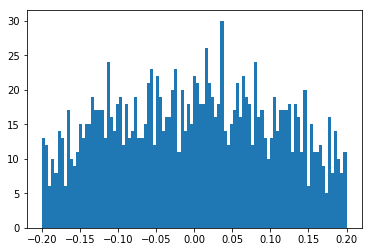

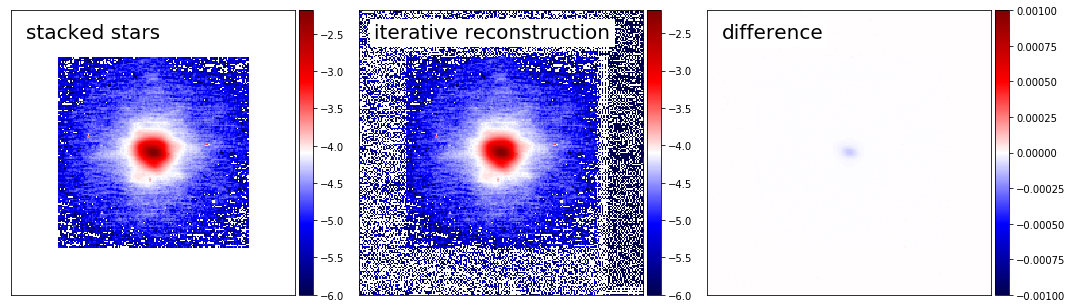

In [6]:
config_file = pd.read_excel("/Users/edenmolina/PycharmProjects/Quasar/Lenstronomy/LenstronomyConfig.xlsx", sheetname="Master")

Names = config_file['Name']
Paths = config_file['Path']
RunBool = config_file['RunBool']
BurnIns = config_file['BurnIn']

for i in range(len(Names)):
    if RunBool[i] == 1:
        print "Plotting %s"%Names[i]
        getPlots("/Users/edenmolina/PycharmProjects/Quasar/Lenstronomy", Names[i], BurnIns[i])
    else:
        print "Skipping %s" % Names[i], "\n"